In [241]:
import requests
import json

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy


In [242]:
json_file = "/Users/larsankile/code/defi-measurement/output/simulation_15260201_1600.json"

In [243]:
# Parse the JSON response into a Python data structure
with open(json_file, "r") as f:
    data = json.loads(f.read())

# Extract the 'permutation_prices' list from the data
permutation_prices = data['permutation_prices']
permutation_prices

[[1626.8354431866114,
  1625.5504409915625,
  1625.5428164887087,
  1621.956550897523,
  1621.9439571798762,
  1621.8178709187252],
 [1626.8354431866114,
  1625.5504409915625,
  1621.9641501825504,
  1621.8380615668,
  1621.8254692291453,
  1621.8178709187252],
 [1626.8354431866114,
  1626.8277545822773,
  1626.8150128435684,
  1625.530241759075,
  1625.4037370904973,
  1621.8179314901054],
 [1626.8354431866114,
  1626.707872630875,
  1626.6951323005574,
  1625.4117172387855,
  1621.8258852454057,
  1621.8182869320622],
 [1626.8354431866114,
  1626.8277545822773,
  1626.8150128435684,
  1625.530241759075,
  1625.4037370904973,
  1621.8179314901054],
 [1626.8354431866114,
  1626.8277545822773,
  1626.8150128435684,
  1623.2188422399915,
  1621.9440177583203,
  1621.8179314901054],
 [1626.8354431866114,
  1626.707872630875,
  1623.1131397957981,
  1623.1005326052364,
  1623.0929253324894,
  1621.8182491555208],
 [1626.8354431866114,
  1625.5504409915625,
  1625.5378053935601,
  1625.5301

In [244]:
import pandas as pd

# Convert the list of lists into a DataFrame
df = pd.DataFrame(permutation_prices)

# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5
0,1626.835443,1625.550441,1625.542816,1621.956551,1621.943957,1621.817871
1,1626.835443,1625.550441,1621.964150,1621.838062,1621.825469,1621.817871
2,1626.835443,1626.827755,1626.815013,1625.530242,1625.403737,1621.817931
3,1626.835443,1626.707873,1626.695132,1625.411717,1621.825885,1621.818287
4,1626.835443,1626.827755,1626.815013,1625.530242,1625.403737,1621.817931


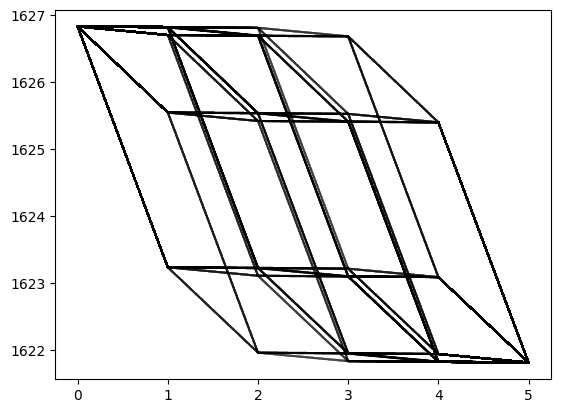

In [245]:
for i, row in df.iterrows():
    plt.plot(row, alpha=0.025, color='black')

In [246]:
# Discretize the plot more finely

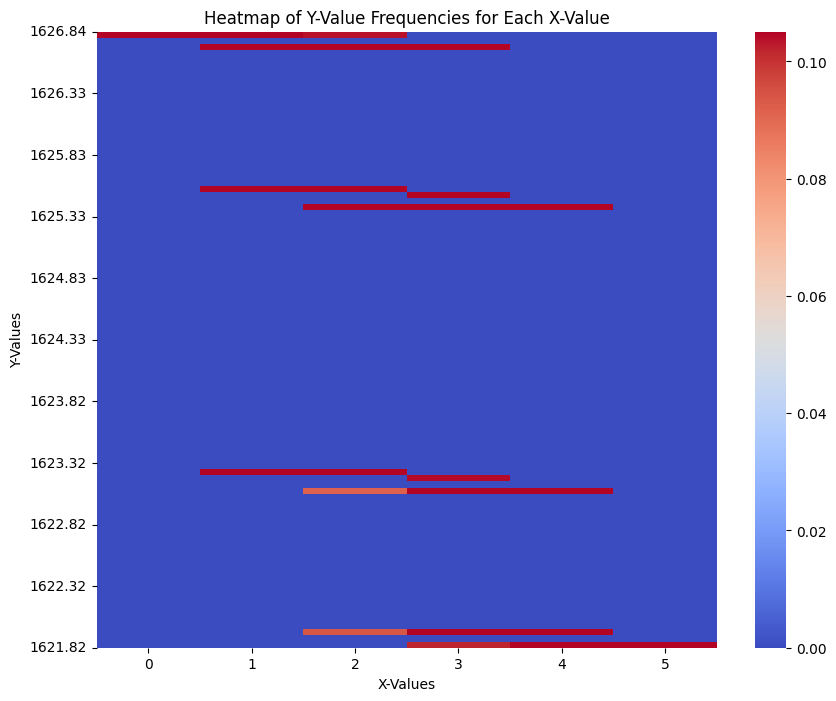

In [247]:
# Create an empty list to store the histograms
histograms = []
bins = 100

# For each column in the DataFrame
for column in df.columns:
    # Calculate the histogram for the column
    hist, edges = np.histogram(df[column], bins=bins, range=(np.min(df.values), np.max(df.values)), density=True)
    # Normalize the histogram by the total number of y-values
    hist = hist / hist.sum()

    # Normalize so that the minimum value is 0 and the maximum value is 1
    # hist = (hist - np.min(hist)) / (np.max(hist) - np.min(hist))

    # Add the histogram to the list
    histograms.append(hist)

# Convert the list of histograms into a 2D array
histograms = np.array(histograms).T

# Create a heatmap from the transposed 2D array with a different color scheme
plt.figure(figsize=(10, 8))

# Set the vmax to be the 99th percentile of the histogram values
vmax = np.percentile(histograms, 97)

sns.heatmap(histograms, cmap='coolwarm', yticklabels=np.linspace(np.min(df.values), np.max(df.values), bins).round(2), vmax=vmax)

# Set the title and labels
plt.title('Heatmap of Y-Value Frequencies for Each X-Value')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')

# Set the number of tick labels on the y-axis
plt.yticks(np.linspace(0, bins, 11), np.linspace(np.min(df.values), np.max(df.values), 11).round(2))

# Invert the y-axis so that the highest y-value is at the top
plt.gca().invert_yaxis()


# Display the plot
plt.show()

In [248]:
# Create an array of new x-values
new_x_values = np.linspace(df.columns.min(), df.columns.max(), len(df.columns) * 10)

# Create an empty DataFrame to store the interpolated y-values
df_interp = pd.DataFrame(columns=new_x_values, index=df.index)

# For each row in the DataFrame
for index, row in df.iterrows():
    # Interpolate the y-values
    y_interp = np.interp(new_x_values, df.columns, row)
    # Add the interpolated y-values to the DataFrame
    df_interp.loc[index] = y_interp

# Display the first few rows of the DataFrame
df_interp.head()

,0.000000,0.084746,0.169492,0.254237,0.338983,0.423729,0.508475,0.593220,0.677966,0.762712,...,4.237288,4.322034,4.406780,4.491525,4.576271,4.661017,4.745763,4.830508,4.915254,5.000000
0,1626.835443,1626.726545,1626.617646,1626.508748,1626.399849,1626.290951,1626.182052,1626.073154,1625.964255,1625.855357,...,1621.914038,1621.903353,1621.892668,1621.881983,1621.871297,1621.860612,1621.849927,1621.839241,1621.828556,1621.817871
1,1626.835443,1626.726545,1626.617646,1626.508748,1626.399849,1626.290951,1626.182052,1626.073154,1625.964255,1625.855357,...,1621.823666,1621.823022,1621.822378,1621.821734,1621.821091,1621.820447,1621.819803,1621.819159,1621.818515,1621.817871
2,1626.835443,1626.834792,1626.83414,1626.833488,1626.832837,1626.832185,1626.831534,1626.830882,1626.830231,1626.829579,...,1624.552868,1624.248986,1623.945104,1623.641222,1623.337341,1623.033459,1622.729577,1622.425695,1622.121813,1621.817931
3,1626.835443,1626.824632,1626.813821,1626.80301,1626.792199,1626.781388,1626.770577,1626.759766,1626.748955,1626.738144,...,1621.824082,1621.823438,1621.822794,1621.82215,1621.821507,1621.820863,1621.820219,1621.819575,1621.818931,1621.818287
4,1626.835443,1626.834792,1626.83414,1626.833488,1626.832837,1626.832185,1626.831534,1626.830882,1626.830231,1626.829579,...,1624.552868,1624.248986,1623.945104,1623.641222,1623.337341,1623.033459,1622.729577,1622.425695,1622.121813,1621.817931


0.0 1.0000000000000016
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


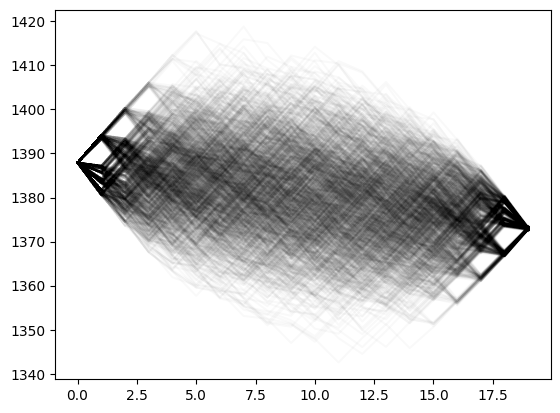

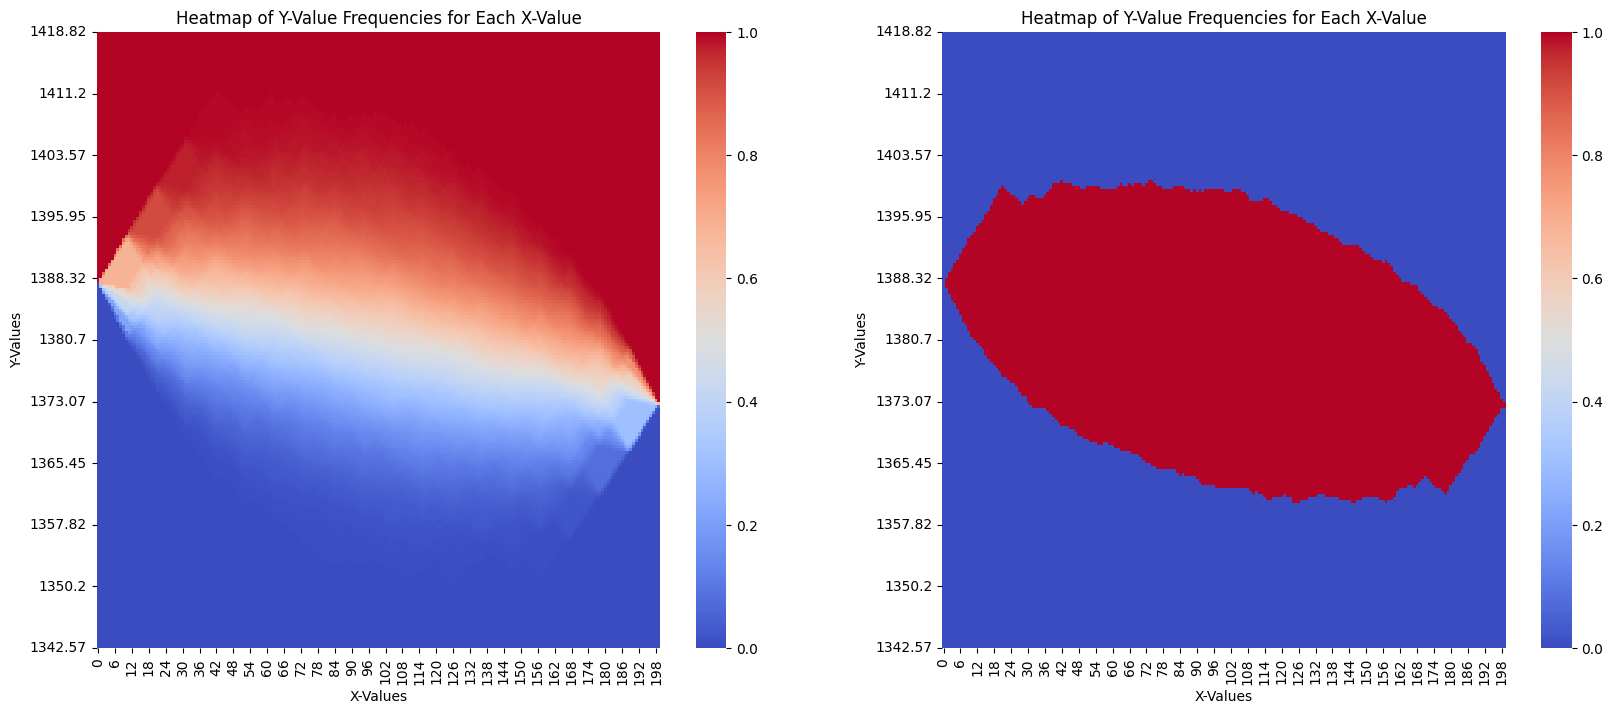

In [272]:
def make_histograms(df, bins=100):
        # Create an empty list to store the histograms
    histograms = []

    # For each column in the DataFrame
    for column in df.columns:
        # Calculate the histogram for the column
        hist, edges = np.histogram(  # type: ignore
            df[column],
            bins=bins,
            range=(np.min(df.values), np.max(df.values)),
            density=True,
        )
        # Normalize the histogram by the total number of y-values
        hist = hist / hist.sum()

        # Normalize so that the minimum value is 0 and the maximum value is 1
        # hist = (hist - np.min(hist)) / (np.max(hist) - np.min(hist))

        # Add the histogram to the list
        histograms.append(hist)

    histograms = np.array(histograms).T

    return histograms

def plot_heatmap(histograms, ymin, ymax, bins=100, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Set the vmax to be the 99th percentile of the histogram values
    vmax = np.percentile(histograms, 98)

    sns.heatmap(
        histograms,
        cmap="coolwarm",
        yticklabels=np.linspace(ymin, ymax, bins).round(2),  # type: ignore
        vmax=vmax,
        ax=ax,
    )

    ax.plot(df.values[0], color="black", linestyle="--", linewidth=10)

    # set the y limits
    # ax.set_ylim(ymin, ymax)


    # Set the title and labels
    ax.set_title("Heatmap of Y-Value Frequencies for Each X-Value")
    ax.set_xlabel("X-Values")
    ax.set_ylabel("Y-Values")

    # Set the number of tick labels on the y-axis
    ax.set_yticks(
        np.linspace(0, bins, 11),
        np.linspace(np.min(df.values), np.max(df.values), 11).round(2),
    )

    # Invert the y-axis so that the highest y-value is at the top
    ax.invert_yaxis()


def interpolate(df, bins=100) -> pd.DataFrame:
    new_x_values = np.linspace(df.columns.min(), df.columns.max(), bins)

    # Create an empty DataFrame to store the interpolated y-values
    df_interp = pd.DataFrame(columns=new_x_values, index=df.index)

    # For each row in the DataFrame
    for index, row in df.iterrows():
        # Interpolate the y-values
        y_interp = np.interp(new_x_values, df.columns, row)
        # Add the interpolated y-values to the DataFrame
        df_interp.loc[index] = y_interp

    df_interp = df_interp.astype(float)

    return df_interp


def smooth(df, sigma: float = 1) -> pd.DataFrame:
    df_smooth = pd.DataFrame(
        scipy.ndimage.gaussian_filter(df.values, sigma=sigma),
        columns=df.columns,
        index=df.index,
    )
    return df_smooth

for i, row in df.iterrows():
    plt.plot(row, alpha=0.025, color='black')

bins = 200

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))

df1 = df.copy()
df1 = interpolate(df1, bins=bins)

histograms = make_histograms(df1, bins=bins)

# Take the cumsum along the vertical axis
histograms = np.cumsum(histograms, axis=0)
plot_heatmap(histograms, ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax0)
# df1 = smooth(df1, sigma=0.75)
# plot_heatmap(df1, ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax1)

print(histograms.min(), histograms.max())
print(((histograms < 0.90) & (histograms > 0.1)).astype(float))
# Threshold the histograms so that values in the range [0.05, 0.95] are set to 1 and all other values are set to 0
plot_heatmap(((histograms < 0.95) & (histograms > 0.05)).astype(float), ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax1)

plt.show()

AttributeError: QuadMesh.set() got an unexpected keyword argument 'density'

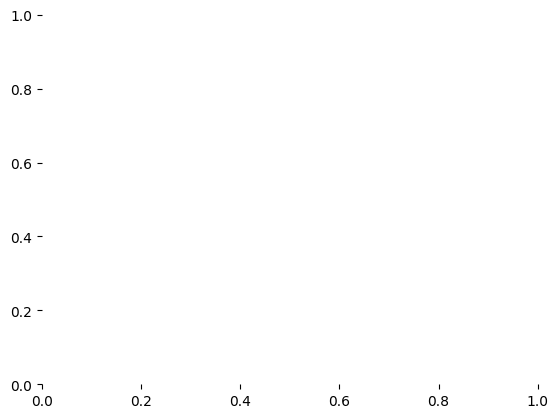

In [142]:
cumsum = df.cumsum(axis=0)

sns.heatmap(cumsum, cmap="coolwarm")

In [ ]:

cumsum = interpolate(cumsum, bins=bins)
plot_heatmap(cumsum, ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax0)
cumsum = smooth(cumsum, sigma=0.75)
plot_heatmap(cumsum, ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax1)

plt.show()

In [267]:
json_file = "/Users/larsankile/code/defi-measurement/output/simulation_15154740_1600.json"


0.0 1.0000000000000016
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


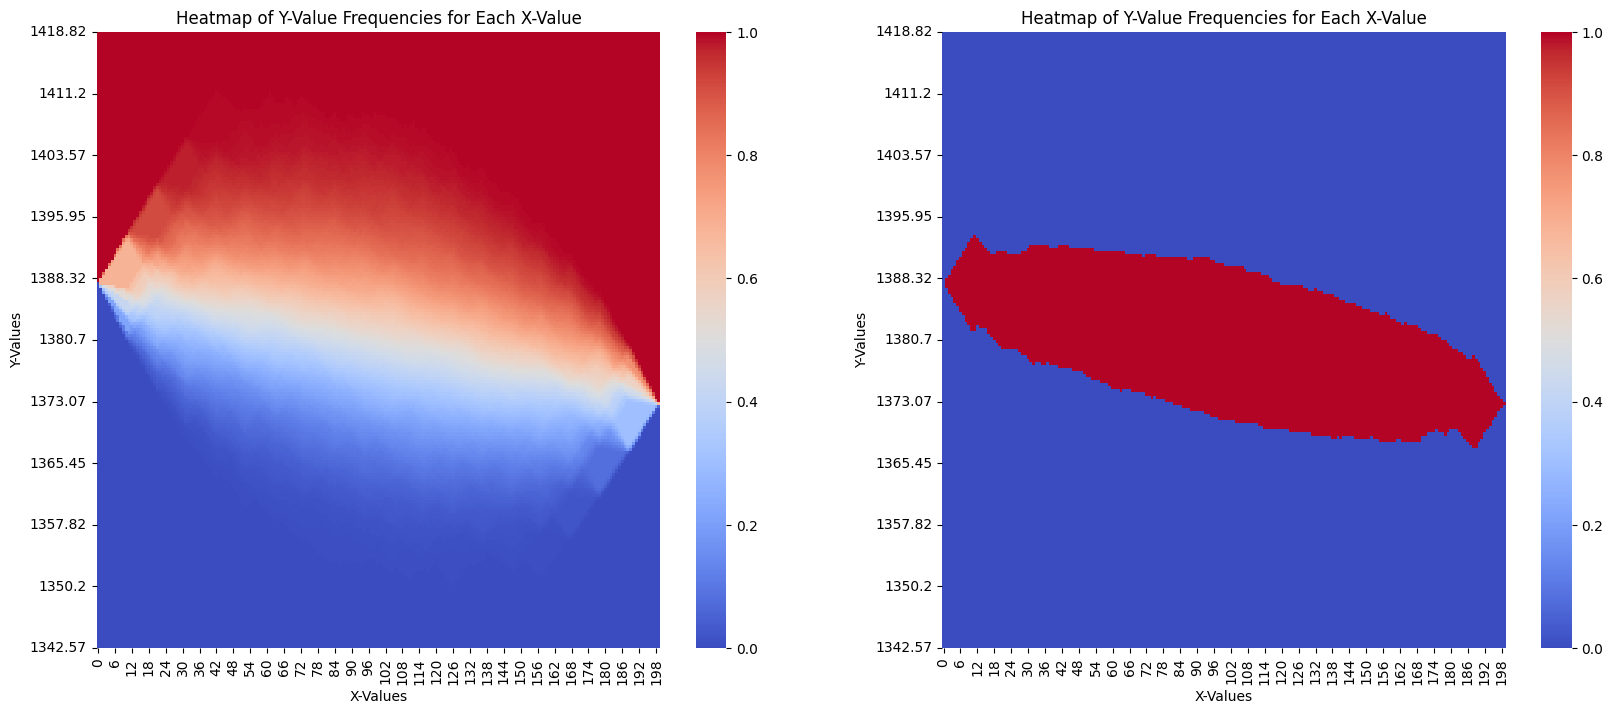

In [268]:
# Parse the JSON response into a Python data structure
with open(json_file, "r") as f:
    data = json.loads(f.read())

# Extract the 'permutation_prices' list from the data
permutation_prices = data['permutation_prices']

import pandas as pd

# Convert the list of lists into a DataFrame
df = pd.DataFrame(permutation_prices)

def make_histograms(df, bins=100):
        # Create an empty list to store the histograms
    histograms = []

    # For each column in the DataFrame
    for column in df.columns:
        # Calculate the histogram for the column
        hist, edges = np.histogram(  # type: ignore
            df[column],
            bins=bins,
            range=(np.min(df.values), np.max(df.values)),
            density=True,
        )
        # Normalize the histogram by the total number of y-values
        hist = hist / hist.sum()

        # Normalize so that the minimum value is 0 and the maximum value is 1
        # hist = (hist - np.min(hist)) / (np.max(hist) - np.min(hist))

        # Add the histogram to the list
        histograms.append(hist)

    histograms = np.array(histograms).T

    return histograms

def plot_heatmap(histograms, ymin, ymax, bins=100, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    # Set the vmax to be the 99th percentile of the histogram values
    vmax = np.percentile(histograms, 98)

    sns.heatmap(
        histograms,
        cmap="coolwarm",
        yticklabels=np.linspace(ymin, ymax, bins).round(2),  # type: ignore
        vmax=vmax,
        ax=ax,
    )

    ax.plot(df.values[0], color="black", linestyle="--", linewidth=10)

    # set the y limits
    # ax.set_ylim(ymin, ymax)


    # Set the title and labels
    ax.set_title("Heatmap of Y-Value Frequencies for Each X-Value")
    ax.set_xlabel("X-Values")
    ax.set_ylabel("Y-Values")

    # Set the number of tick labels on the y-axis
    ax.set_yticks(
        np.linspace(0, bins, 11),
        np.linspace(np.min(df.values), np.max(df.values), 11).round(2),
    )

    # Invert the y-axis so that the highest y-value is at the top
    ax.invert_yaxis()


def interpolate(df, bins=100) -> pd.DataFrame:
    new_x_values = np.linspace(df.columns.min(), df.columns.max(), bins)

    # Create an empty DataFrame to store the interpolated y-values
    df_interp = pd.DataFrame(columns=new_x_values, index=df.index)

    # For each row in the DataFrame
    for index, row in df.iterrows():
        # Interpolate the y-values
        y_interp = np.interp(new_x_values, df.columns, row)
        # Add the interpolated y-values to the DataFrame
        df_interp.loc[index] = y_interp

    df_interp = df_interp.astype(float)

    return df_interp


def smooth(df, sigma: float = 1) -> pd.DataFrame:
    df_smooth = pd.DataFrame(
        scipy.ndimage.gaussian_filter(df.values, sigma=sigma),
        columns=df.columns,
        index=df.index,
    )
    return df_smooth


bins = 200

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))

df1 = df.copy()
df1 = interpolate(df1, bins=bins)

histograms = make_histograms(df1, bins=bins)

# Take the cumsum along the vertical axis
histograms = np.cumsum(histograms, axis=0)
plot_heatmap(histograms, ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax0)
# df1 = smooth(df1, sigma=0.75)
# plot_heatmap(df1, ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax1)

print(histograms.min(), histograms.max())
print(((histograms < 0.90) & (histograms > 0.1)).astype(float))
# Threshold the histograms so that values in the range [0.05, 0.95] are set to 1 and all other values are set to 0
plot_heatmap(((histograms < 0.8) & (histograms > 0.2)).astype(float), ymin=np.min(df.values), ymax=np.max(df.values), bins=bins, ax=ax1)

plt.show()

## Check the frequencies of all BBS and SSBs in the dataset

In [159]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd

import os

from dotenv import load_dotenv

load_dotenv(override=True)

postgres_uri = os.environ["POSTGRESQL_URI_US"]

engine = create_engine(postgres_uri)

Session = sessionmaker(bind=engine)

In [166]:
from sqlalchemy import text

query = lambda offset: f"""
    WITH pairs AS (
        SELECT block_number, address, MIN(block_timestamp) AS block_timestamp
        FROM (
            SELECT block_number, address
            FROM swaps
            GROUP BY block_number, address
            HAVING 
                (SUM(CASE WHEN amount0 LIKE '-%' THEN 1 ELSE 0 END) = 2 AND SUM(CASE WHEN amount0 NOT LIKE '-%' THEN 1 ELSE 0 END) = 1)
                OR
                (SUM(CASE WHEN amount0 LIKE '-%' THEN 1 ELSE 0 END) = 1 AND SUM(CASE WHEN amount0 NOT LIKE '-%' THEN 1 ELSE 0 END) = 2)
            ORDER BY block_number, address
        ) sub
        LIMIT 10000
        OFFSET {offset}
    )
    SELECT t.*
    FROM swaps t
    JOIN pairs p ON t.block_number = p.block_number AND t.address = p.address;
    """

# Execute the query and save the results
with engine.connect() as conn:
    q = conn.execute(text(query(offset=0)))
    results = q.fetchall()


In [171]:
# GET THE column names
q.keys()


RMKeyView(['block_ts', 'block_number', 'tx_hash', 'log_index', 'sender', 'recipient', 'amount0', 'amount1', 'sqrtpricex96', 'liquidity', 'tick', 'address', 'to_address', 'from_address', 'transaction_index'])

In [185]:
from tqdm import trange


it = trange(0, 476_804, 10_000)

conn = engine.connect()

aab = 0
aba = 0
baa = 0

for offset in it:
    q = conn.execute(text(query(offset=0)))
    results = q.fetchall()

    df = pd.DataFrame(results, columns=q.keys()).sort_values(by=["block_number", "address", "transaction_index"]) # type: ignore
    df = df.assign(direction=df.amount0.str.startswith("-").astype(int))

    for i, group in df.groupby(["block_number", "address"]):
        if group.direction.iloc[0] == group.direction.iloc[1]:
            aab += 1
        elif group.direction.iloc[0] == group.direction.iloc[2]:
            aba += 1
        elif group.direction.iloc[1] == group.direction.iloc[2]:
            baa += 1
        else:
            raise ValueError(f"Unexpected group: {group.amount0.to_list()}, {group.direction.to_list()}")

    it.set_description(f"aab: {aab}, aba: {aba}, baa: {baa}")

conn.close()


aab: 202608, aba: 119904, baa: 157488: 100%|██████████| 48/48 [01:27<00:00,  1.82s/it]


In [209]:
# Measure the statistical significance of each of the counts being different from 33%
from scipy.stats import binomtest # type: ignore

def get_ps(a, b, c) -> tuple:
    total = a + b + c
    p1 = binomtest(a, total, p=1/3).pvalue
    p2 = binomtest(b, total, p=1/3).pvalue
    p3 = binomtest(c, total, p=1/3).pvalue

    return (p1, p2, p3)

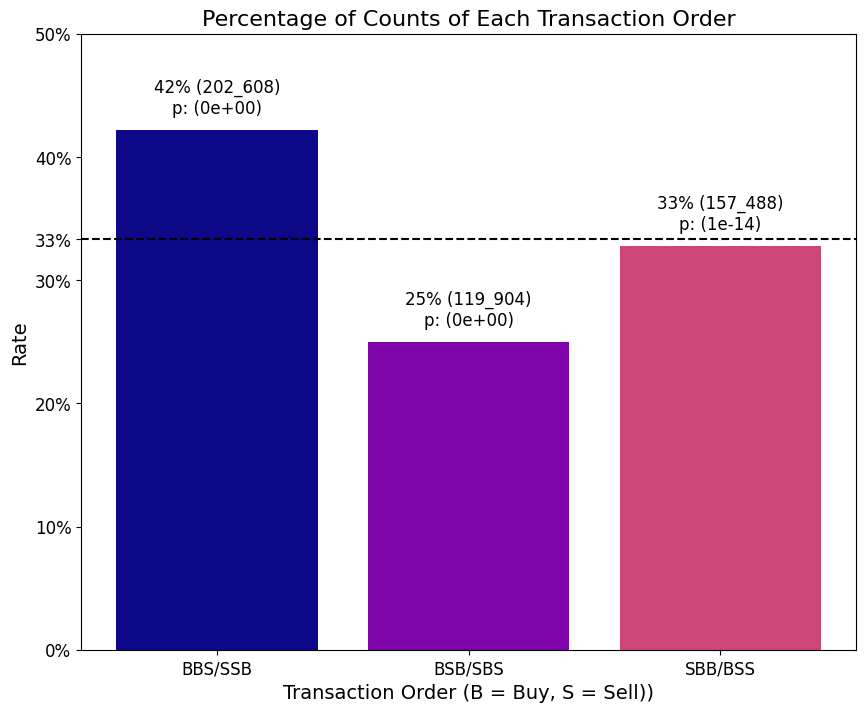

In [239]:
import matplotlib.cm as cm

# Make a bar plot of the percentage of the counts of the total with a horizontal line at 33%
plt.figure(figsize=(10, 8))

# Calculate the percentage of each count
counts = np.array([aab, aba, baa])
# counts = np.array([33, 33, 33])
percentage = counts / counts.sum()

ps = get_ps(*counts)

n = len(percentage)  # the number of different bars
colors = cm.plasma(np.linspace(0, 0.5, n))

# Make a bar plot of the counts
plt.bar([0, 1, 2], percentage, color=colors)

# Add a horizontal line at 33%
plt.axhline(1 / 3, color='black', linestyle='--')


# Set the x-ticks to be the labels
plt.xticks([0, 1, 2], ['BBS/SSB', 'BSB/SBS', 'SBB/BSS'], fontsize=12)

# Set the title and labels
plt.title('Percentage of Counts of Each Transaction Order', fontsize=16)
plt.xlabel('Transaction Order (B = Buy, S = Sell))', fontsize=14)
plt.ylabel('Rate', fontsize=14)

# Add labels of the percentage and absolute counts to the bars
for i, (perc, count, p) in enumerate(zip(percentage, counts, ps)):
    plt.text(i, perc + 0.01, f'{perc:.0%} ({count:_})\np: ({p:.0e})', ha='center', va='bottom', color='black', fontsize=12)

# Set the y-axis limits
plt.ylim(0, 0.5)

# Format the y-axis as a percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format)) # type: ignore

# Add a tick mark at 33% on the y-axis to the already existing tick marks with fontsize 12
plt.gca().yaxis.set_ticks(np.append(plt.gca().get_yticks(), 1 / 3)) # type: ignore
plt.gca().tick_params(axis='y', labelsize=12)
